In [1]:
import requests
import pandas as pd
import json
from pyhocon import ConfigFactory
import os
import time
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# conf = ConfigFactory.parse_file('API_Keys.conf')
# key = conf.get_string('API.covalent.key')

In [3]:
# pths = r'D:\Teller_Finance\wallet_info_from_covalent'

In [4]:
# #fetch all wallet data
# wallet_address = []
# wallet_files = os.listdir(pths)
# while wallet_files:
#     data= pd.read_csv(pths + '\\'+ wallet_files.pop()).drop(columns=['Unnamed: 0','index']).dropna()
#     wallet_address.extend(data['address'].unique().tolist())

In [5]:
# print('Number of wallet...', len(wallet_address))

In [6]:
# wallet_files = os.listdir(pths)
# wallet_raw_df = pd.DataFrame()
# i = 0
# while wallet_files:
#     data= pd.read_csv(pths + '\\'+ wallet_files.pop()).drop(columns=['Unnamed: 0','index']).dropna()
#     wallet_raw_df = wallet_raw_df.append(data)
# wallet_raw_df.to_parquet('wallet_raw_df.parquet.gzip', compression='gzip')


In [7]:
# def create_api_string(api, input_dict=None):
#     try:
#         return api.format(**input_dict)
#     except:
#         print('Failed to Create Api String')

In [8]:
# def secs():
#     return np.random.randint(1,5)

# df_res= pd.DataFrame()
# for addr in wallet_address[0:500]:
#     time.sleep(secs())
#     input_dict = {"address":addr, "blockchain_data" :"balances_v2"}
#     api_= create_api_string("https://api.covalenthq.com/v1/1/address/{address}/{blockchain_data}/",input_dict)
#     params={"limit":"100", "key":key } # replace the key with your key and : at the end and this should work
#     r = requests.get(api_ ,params = params)
#     df = pd.read_json(r.content,orient='index').reset_index().rename(columns={'index':'server_output'})
#     df = df.loc[ df['server_output'] == 'data'] # get the data component as opposed to error
#     df_res = df_res.append(df)


In [9]:
# df_res.to_parquet('balance_data_first_500_wallets.gzip',
#               compression='gzip')

In [10]:
fl='covalent_balance_snapshot_as_of_5_28.gzip'
df_res=pd.read_parquet(fl)

In [11]:
df_balance=pd.DataFrame()
df_balance['quote_currency']  =np.nan
df_balance['balance'] = np.nan

for ll in range(df_res.shape[0]):
    quote_currency =df_res['quote_currency'].iloc[ll]
    for cc in df_res['items'].iloc[ll]:
        if cc['contract_name'] == 'Ether':
            balance = int(cc['balance'])/10**int(cc['contract_decimals'])
    df_balance.loc[ll] = [quote_currency,balance]
            

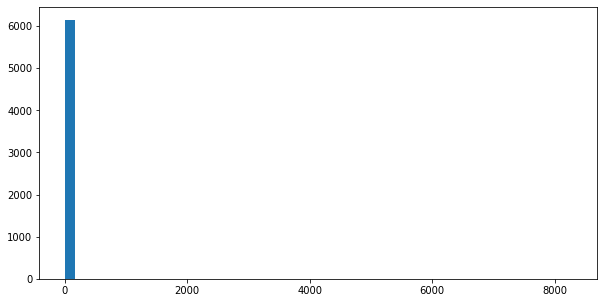

In [12]:
figure = plt.figure(figsize = [10,5])
plt.hist( df_balance['balance'], bins = 50)
plt.show()

In [13]:
df_balance['balance'].describe()

count    6159.000000
mean        4.211415
std       111.309518
min         0.000000
25%         0.013580
50%         0.081368
75%         0.481037
max      8281.442928
Name: balance, dtype: float64

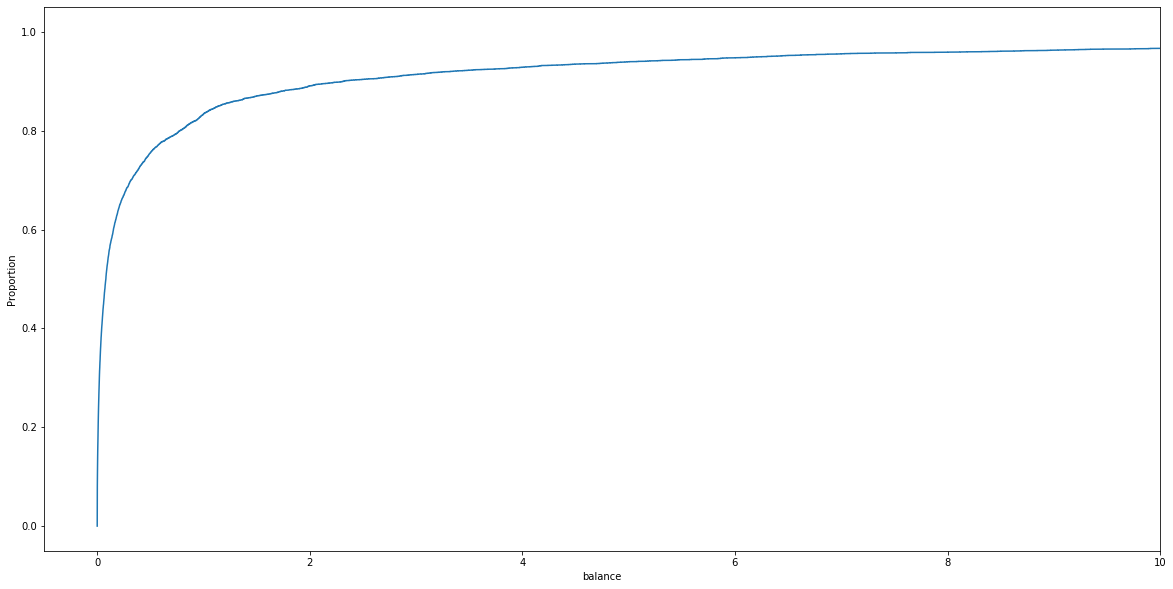

In [14]:
figure = plt.figure(figsize = [20,10])
sns.ecdfplot(data=df_balance, x="balance" , stat='proportion')
plt.xlim(-0.5,10)
plt.show()

In [15]:
np.round(100*df_balance[df_balance['balance']==0].shape[0]/df_balance.shape[0],2)

5.13

In [16]:
#how much dollar balance is in each wallet? These are all in USD

df_dollar_balance=pd.DataFrame()
df_dollar_balance['quote_currency']  =np.nan
df_dollar_balance['balance'] = np.nan
for ll in range(df_res.shape[0]):
    quote_currency =df_res['quote_currency'].iloc[ll]
    balance = []
    for cc in df_res['items'].iloc[ll]:
        balance.append( int(cc['quote']))
    dollar_balance = sum(balance)
    df_dollar_balance.loc[ll] = [quote_currency,dollar_balance]

In [17]:
df_dollar_balance

,quote_currency,balance
0,USD,18.0
1,USD,627979.0
2,USD,378.0
3,USD,16667.0
4,USD,171.0
5,USD,17.0
6,USD,6398.0
7,USD,801.0
8,USD,10686.0
9,USD,1421.0


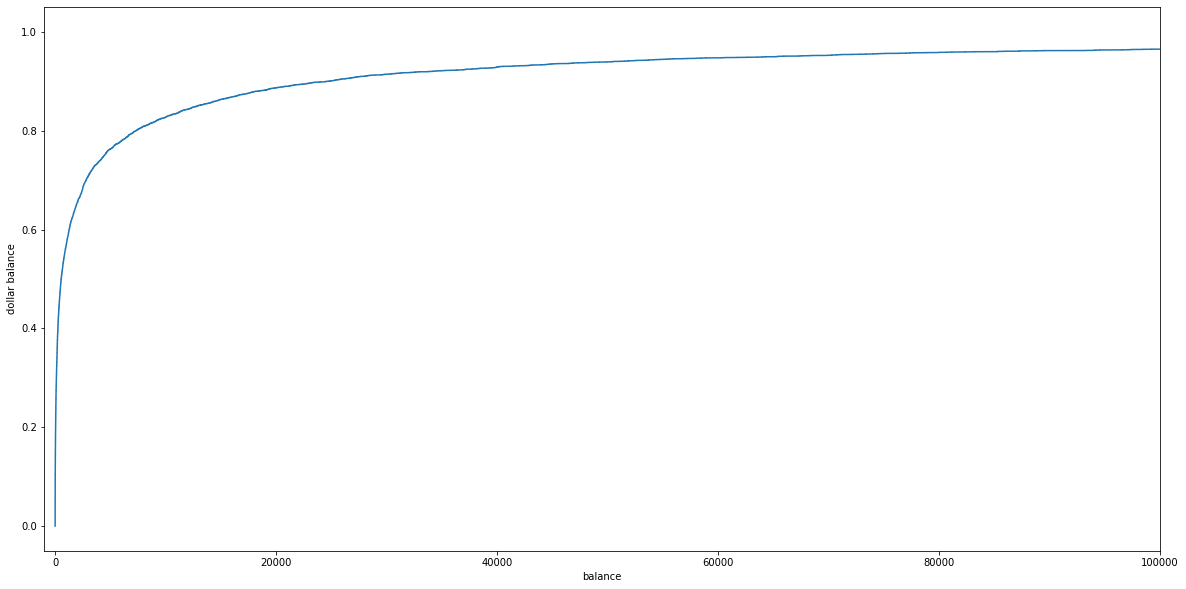

In [18]:
figure = plt.figure(figsize = [20,10])
sns.ecdfplot(data=df_dollar_balance, x="balance" , stat='proportion')
plt.xlim(-1000,1e5)
plt.ylabel('dollar balance')
plt.show()

In [19]:
df_dollar_balance['balance'].describe()

count    6.159000e+03
mean     1.037648e+05
std      4.855304e+06
min      0.000000e+00
25%      7.200000e+01
50%      5.500000e+02
75%      4.426500e+03
max      3.772812e+08
Name: balance, dtype: float64

In [20]:
np.round(100*df_balance[df_dollar_balance['balance']==0].shape[0]/df_dollar_balance.shape[0],2)

4.82

In [21]:
df_dollar_balance['balance'].quantile(0.9)

24579.399999999972

In [22]:
df_dollar_balance['balance'].quantile(0.8)

7328.200000000002

In [23]:
df_dollar_balance['balance'].quantile(.5)

550.0

In [24]:
df_dollar_balance_with_wallet=pd.DataFrame()
df_dollar_balance_with_wallet['quote_currency']  =np.nan
df_dollar_balance_with_wallet['balance'] = np.nan
df_dollar_balance_with_wallet['address'] = np.nan
for ll in range(df_res.shape[0]):
    quote_currency =df_res['quote_currency'].iloc[ll]
    balance = []
    for cc in df_res['items'].iloc[ll]:
        balance.append( int(cc['quote']))
    dollar_balance = sum(balance)
    df_dollar_balance_with_wallet.loc[ll] = [df_res['address'].iloc[ll],quote_currency,dollar_balance]

In [25]:
df_dollar_balance_with_wallet[ df_dollar_balance_with_wallet.address ==  df_dollar_balance_with_wallet['address'].quantile(.5)]

,quote_currency,balance,address
1317,0x912190dcb9dbd95106f3859e1d08ef290084d690,USD,550.0
1539,0xb1b16fa796ccc526c80241776ee9b972184d0028,USD,550.0
